# 🏦 Fixed Income — Bond Pricing and Yield to Maturity (YTM)

---

## Bond Pricing:

A bond’s price is the present value of its future cash flows (coupon payments + principal):

\[
P = \sum_{t=1}^{T} \frac{C}{(1 + y)^t} + \frac{F}{(1 + y)^T}
\]

Where:

- \( P \): Price of the bond
- \( C \): Coupon payment per period
- \( F \): Face value (par value)
- \( y \): Yield per period (discount rate)
- \( T \): Number of periods (maturity)

---

## Yield to Maturity (YTM):

- The **YTM** is the discount rate \( y \) that sets the present value of cash flows equal to the bond price.
- YTM reflects the annualized return if the bond is held to maturity, assuming all coupons are reinvested at YTM


Bond price: $95.00
Yield to Maturity (YTM): 5.67%


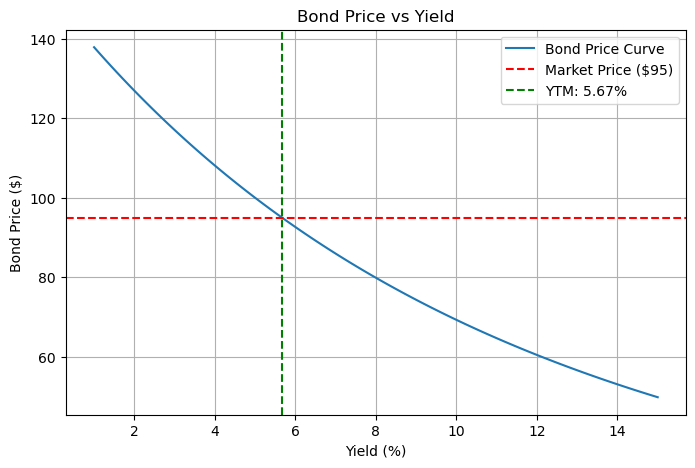

In [1]:
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt

# Bond parameters
C = 5        # Coupon payment per period ($5)
F = 100      # Face value ($100)
T = 10       # Maturity in years
P = 95       # Current price

# Bond pricing function given yield y
def bond_price(y, C, F, T):
    cash_flows = np.array([C] * T)
    cash_flows[-1] += F  # add face value to last coupon
    periods = np.arange(1, T + 1)
    return np.sum(cash_flows / (1 + y) ** periods)

# Find YTM (yield y that makes bond price = P)
def ytm_function(y):
    return bond_price(y, C, F, T) - P

# Solve for YTM
ytm = newton(ytm_function, 0.05)  # initial guess 5%

print(f"Bond price: ${bond_price(ytm, C, F, T):.2f}")
print(f"Yield to Maturity (YTM): {ytm*100:.2f}%")

# Plot bond price vs yield
yields = np.linspace(0.01, 0.15, 100)
prices = [bond_price(y, C, F, T) for y in yields]

plt.figure(figsize=(8, 5))
plt.plot(yields * 100, prices, label="Bond Price Curve")
plt.axhline(P, color='red', linestyle='--', label="Market Price ($95)")
plt.axvline(ytm * 100, color='green', linestyle='--', label=f"YTM: {ytm*100:.2f}%")
plt.title("Bond Price vs Yield")
plt.xlabel("Yield (%)")
plt.ylabel("Bond Price ($)")
plt.legend()
plt.grid(True)
plt.show()
